<a href="https://colab.research.google.com/github/tcqnmi/Sistemas_IA/blob/main/RN_Regresion_Celsius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [5]:
#Generación de datos de entrenamiento

celsius= np.array ([-18,-10,0,1,3,8,25,22,26,38],dtype=float)
fahrenheit=np.array([-0.4,14,32,33.8,37.4,46.4,59,71.6,84.2,100.4],dtype=float)


In [43]:
#Creamos una red con una neurona

model = Sequential()
model.add(Dense(units=2, input_shape=[1]))
model.add(Dense(units=1, input_shape=[1]))
model.compile(optimizer=Adam(learning_rate=0.2), loss='mean_squared_error')

In [44]:
#Entrenamiento del modelo

hist=model.fit(celsius, fahrenheit, epochs=2000, verbose=0)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 4         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
#Pesos finales
pesos= model.layers[0].get_weights()
pendiente = pesos[0][0]
ordenada = pesos[1][0]

print("Peso (pendiente):", pendiente)
print("Peso (ordenada):", ordenada)

Peso (pendiente): [-0.369452  -1.1359602]
Peso (ordenada): 7.3914065


Resultados: (hist)  ['loss']
1/1 [==============================] - 0s 107ms/step - loss: 32.4516
Pérdida final:  32.45164108276367


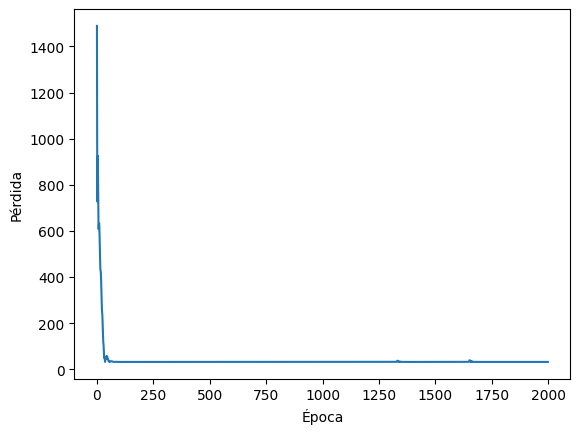

In [46]:
print("Resultados: (hist) ",list(hist.history.keys()))

#Evaluación del modelo
print("Pérdida final: ",model.evaluate(celsius,fahrenheit))

#Representación gráfica de los resultados de la función de pérdida
plt.plot(hist.history['loss'])

plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

1/1 [==============================] - 0s 63ms/step


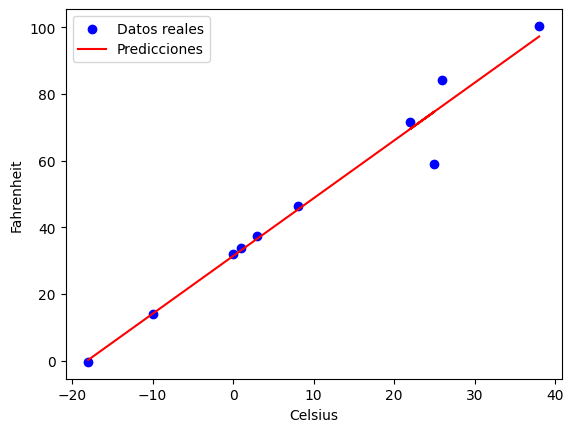

In [47]:
#Representación gráfica de los resultados obtenidos por el modelo

plt.scatter(celsius,fahrenheit, color='blue',label='Datos reales')
plt.plot(celsius,model.predict(celsius),color='red',label="Predicciones")
plt.title=("Conversión de Celsius a Fahrenheit")
plt.xlabel('Celsius')
plt.ylabel("Fahrenheit")
plt.legend()
plt.show()